### Dataset: generated through random effect(v)

A More Robust Random Effects Model for Disease Mapping paper

In [1]:
# Import libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducibility
np.random.seed(42)

In [3]:
# Number of regions (geographical areas)
n_regions = 50

In [4]:
# Expected number of cases per region (constant for simplicity)
E = np.full(n_regions, 30)

Scenario 1: Unstructured Random Effect from Inverse Gaussian ---

In [5]:
phi_IG = np.random.wald(mean=0.5, scale=1, size=n_regions)  # Inverse Gaussian

In [6]:
phi_IG

array([0.70914307, 0.55133181, 0.42378456, 0.58991557, 0.17227027,
       0.85475887, 0.35929555, 0.34147515, 0.42145918, 0.14090411,
       0.24787212, 0.40055709, 0.18489218, 0.42629398, 0.73304492,
       0.46229077, 0.76218913, 0.40695937, 0.49525073, 1.03909386,
       0.28171112, 0.21618205, 1.23929136, 0.57461363, 0.29832722,
       0.44297195, 0.46074981, 0.40427517, 0.36151743, 0.24068807,
       0.39779811, 0.65593921, 0.31119118, 0.76802801, 1.02084479,
       0.26176479, 0.89752897, 0.62192597, 0.35687335, 0.43852704,
       0.88141458, 0.1981451 , 0.64524606, 0.31808063, 0.51282787,
       0.17382853, 0.47015679, 0.40487153, 0.42813234, 0.64320191])

In [7]:
mu_IG = np.exp(phi_IG)  # Relative risk

In [8]:
mu_IG

array([2.03224901, 1.73556292, 1.52773242, 1.80383611, 1.18799887,
       2.35080746, 1.43232006, 1.40702162, 1.524184  , 1.15131425,
       1.28129606, 1.49265601, 1.20308872, 1.53157096, 2.08140868,
       1.5877069 , 2.14296231, 1.50224306, 1.64090961, 2.82665451,
       1.32539578, 1.24132834, 3.45316554, 1.77644403, 1.34760268,
       1.55732864, 1.58526218, 1.49821615, 1.43550604, 1.27212416,
       1.48854348, 1.92695148, 1.36505017, 2.15551141, 2.77553853,
       1.29922092, 2.45353287, 1.86251173, 1.42885489, 1.55042182,
       2.41431253, 1.21913928, 1.90645608, 1.37448708, 1.67000709,
       1.18985152, 1.60024508, 1.4991099 , 1.53438913, 1.90256297])

In [9]:
Y_IG = np.random.poisson(E * mu_IG)  # Simulated number of cases

In [10]:
Y_IG

array([ 54,  47,  58,  57,  41,  83,  39,  37,  44,  26,  51,  45,  34,
        64,  62,  43,  67,  30,  60,  73,  43,  32, 100,  56,  30,  43,
        51,  45,  46,  42,  58,  54,  52,  59,  93,  39,  60,  67,  40,
        56,  76,  30,  59,  31,  51,  38,  52,  41,  49,  61])

Scenario 2: Unstructured Random Effect from Normal Distribution ---

In [11]:
phi_N = np.random.normal(loc=0.5, scale=0.125, size=n_regions)  # Normal
theta_N = np.exp(phi_N)  # Relative risk
Y_N = np.random.poisson(E * theta_N)  # Simulated observed cases

In [12]:
# Create a DataFrame to store results
simulated_data = pd.DataFrame({
    "Region": np.arange(1, n_regions + 1),
    "Expected Cases": E,
    "Phi (Inverse Gaussian)": phi_IG,
    "Observed Cases (IG)": Y_IG,
    "Phi (Normal)": phi_N,
    "Observed Cases (N)": Y_N
})

In [13]:
# Display the simulated data
print("\nSimulated Data for IG and Normal Random Effects:")
simulated_data.head() # Display first few rows


Simulated Data for IG and Normal Random Effects:


,Region,Expected Cases,Phi (Inverse Gaussian),Observed Cases (IG),Phi (Normal),Observed Cases (N)
0,1,30,0.709143,54,0.469326,49
1,2,30,0.551332,47,0.405783,44
2,3,30,0.423785,58,0.388811,40
3,4,30,0.589916,57,0.398024,24
4,5,30,0.172270,41,0.490362,56


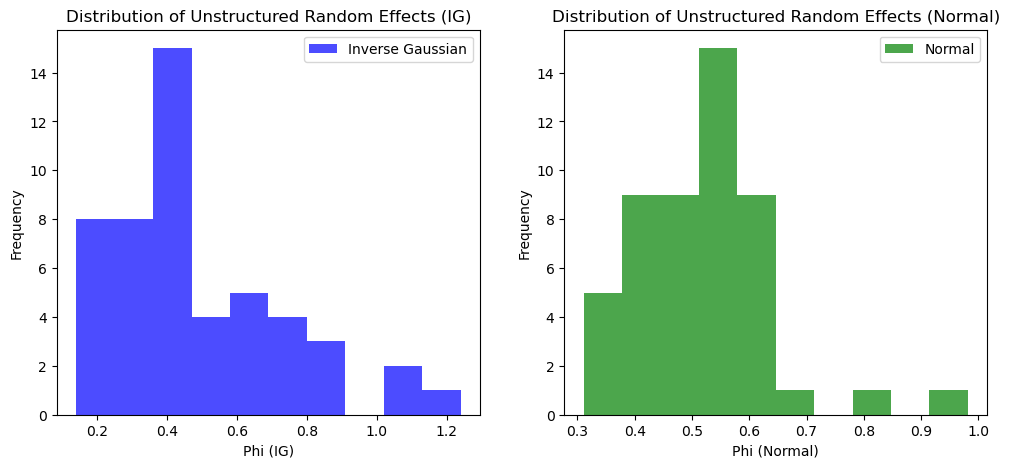

In [14]:
# Plot histograms for phi (random effects)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(phi_IG, bins=10, alpha=0.7, color='b', label="Inverse Gaussian")
ax[0].set_title("Distribution of Unstructured Random Effects (IG)")
ax[0].set_xlabel("Phi (IG)")
ax[0].set_ylabel("Frequency")
ax[0].legend()

ax[1].hist(phi_N, bins=10, alpha=0.7, color='g', label="Normal")
ax[1].set_title("Distribution of Unstructured Random Effects (Normal)")
ax[1].set_xlabel("Phi (Normal)")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.show()

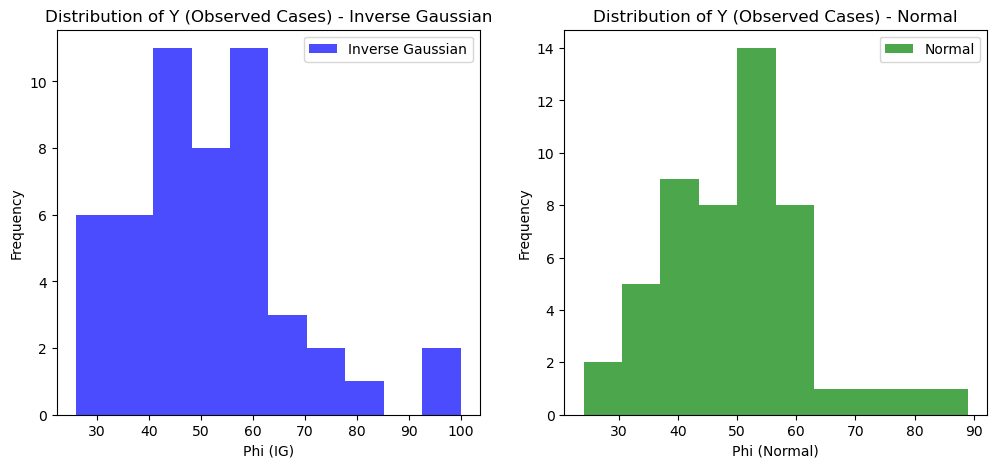

In [15]:
# Plot histograms for observations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(Y_IG, bins=10, alpha=0.7, color='b', label="Inverse Gaussian")
ax[0].set_title("Distribution of Y (Observed Cases) - Inverse Gaussian")
ax[0].set_xlabel("Phi (IG)")
ax[0].set_ylabel("Frequency")
ax[0].legend()

ax[1].hist(Y_N, bins=10, alpha=0.7, color='g', label="Normal")
ax[1].set_title("Distribution of Y (Observed Cases) - Normal")
ax[1].set_xlabel("Phi (Normal)")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.show()

#### Let's fit BYM model for the above data

In [16]:
import pymc as pm
import arviz as az
import pandas as pd
# import ace-tools as tools  # Import ace_tools for data display

Fit Bayesian Model with Poisson Likelihood

In [17]:
with pm.Model() as poisson_model_N:
    # Prior for random effect (Normal)
    vN_prior = pm.Normal("vN", mu=0.5, sigma=0.125, shape=n_regions)
    
    # Define risk parameter
    thetaN = pm.Deterministic("thetaN", pm.math.exp(pm.math.log(E) + vN_prior))
    
    # Poisson likelihood for observed cases
    # Y_obs_N = pm.Poisson("Y_obs_N", mu=thetaN, observed=Y_N)
    Y_obs_N = pm.Poisson("Y_obs_N", mu=thetaN, observed=Y_IG)


    # Sampling
    trace_N = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vN]


/Users/h6x/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets"
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [18]:
# Y_obs_N

In [19]:
# RANDOM_SEED = 8926
# rng = np.random.default_rng(RANDOM_SEED)

In [20]:
# with poisson_model_N:
#     idata = pm.sample(1000, random_seed=rng)  # No explicit sampler


In [21]:
# idata

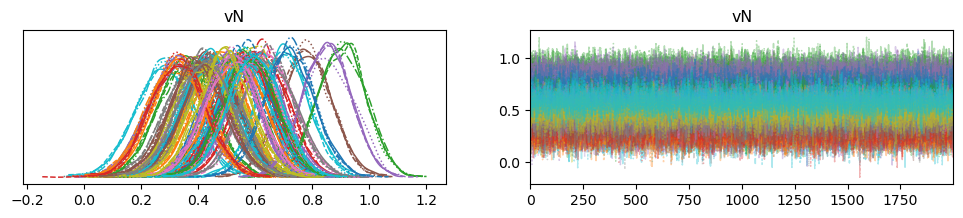

In [22]:
# Plot posterior distributions for v (random effects)
az.plot_trace(trace_N, var_names=["vN"], compact=True)
plt.show()



For the IG data

In [23]:
with pm.Model() as poisson_model_IG:
    # Prior for random effect (Inverse Gaussian)
    vIG_prior = pm.Wald("vIG", mu=0.5, lam=1, shape=n_regions)
    
    # Define risk parameter
    thetaIG = pm.Deterministic("thetaIG", pm.math.exp(pm.math.log(E) + vIG_prior))
    
    # Poisson likelihood for observed cases
    # Y_obs_IG = pm.Poisson("Y_obs_IG", mu=thetaIG, observed=Y_IG)
    Y_obs_IG = pm.Poisson("Y_obs_IG", mu=thetaIG, observed=Y_N)

    
    # Sampling with fixed random_seed and chains=1
    trace_IG = pm.sample(1000, tune=500, target_accept=0.9, return_inferencedata=True, chains=1, random_seed=np.random.randint(1, 2**30))


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [vIG]


/Users/h6x/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets"
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [24]:
summary_IG = az.summary(trace_IG)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


In [25]:
# Display summaries
print("\nPoisson Model with Inverse Gaussian Summary:")
print(summary_IG)


Poisson Model with Inverse Gaussian Summary:
               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
vIG[0]        0.441  0.136   0.183    0.681      0.003    0.002    1621.0   
vIG[1]        0.359  0.115   0.151    0.566      0.003    0.002    1748.0   
vIG[2]        0.302  0.114   0.099    0.503      0.002    0.002    2712.0   
vIG[3]        0.182  0.065   0.071    0.298      0.001    0.001    3000.0   
vIG[4]        0.559  0.137   0.324    0.851      0.003    0.002    1754.0   
...             ...    ...     ...      ...        ...      ...       ...   
thetaIG[45]  46.898  5.862  35.932   57.024      0.127    0.089    1719.0   
thetaIG[46]  50.034  6.939  37.995   62.900      0.146    0.103    1897.0   
thetaIG[47]  49.677  6.857  38.156   62.590      0.157    0.111    1757.0   
thetaIG[48]  42.176  5.000  33.442   51.039      0.109    0.078    1950.0   
thetaIG[49]  53.991  7.333  40.311   66.971      0.140    0.099    2285.0   

             ess_tail  r_hat 

/Users/h6x/anaconda3/envs/pymc_env/lib/python3.12/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (50) in plot_posterior, generating only 40 plots
  warnings.warn(


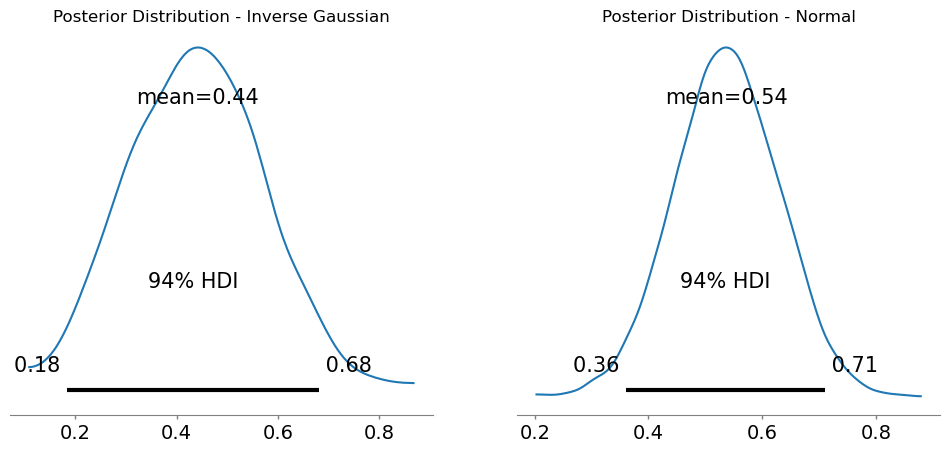

In [26]:
# Plot posterior distributions for v (random effects)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
az.plot_posterior(trace_IG, var_names=['vIG'], ax=ax[0])
ax[0].set_title("Posterior Distribution - Inverse Gaussian")

az.plot_posterior(trace_N, var_names=['vN'], ax=ax[1])
ax[1].set_title("Posterior Distribution - Normal")

plt.show()

MSE Estimation

In [27]:
# True random effects used in data generation
true_v_IG = phi_IG  # Inverse Gaussian
true_v_N = phi_N    # Normal

In [28]:
import arviz as az

# Extract posterior samples for v_i (random effects)
posterior_v_IG = az.extract(trace_IG, var_names=["vIG"]).to_numpy()
posterior_v_N = az.extract(trace_N, var_names=["vN"]).to_numpy()

# Check shape: (number of posterior samples, number of regions)
print(posterior_v_IG.shape)  # Example output: (1000, 50) if we have 1000 samples and 50 regions


(50, 1000)


In [29]:
print(posterior_v_IG.shape)  # Example output: (1000, 50) if we have 1000 samples and 50 regions


(50, 1000)


In [30]:
np.mean(posterior_v_N, axis=1)  .shape

(50,)

In [31]:
# Compute posterior mean estimate for each region
posterior_mean_v_IG = np.mean(posterior_v_IG, axis=1)  # Mean across samples
posterior_mean_v_N = np.mean(posterior_v_N, axis=1)  

In [32]:
posterior_mean_v_N.shape

(50,)

In [33]:
true_v_IG.shape

(50,)

In [34]:
# Compute MSE
MSE_IG = np.mean((posterior_mean_v_IG - true_v_IG) ** 2)
MSE_N = np.mean((posterior_mean_v_N - true_v_N) ** 2)


In [35]:
print(f"MSE (Inverse Gaussian Model): {MSE_IG:.6f}")
print(f"MSE (Normal Model): {MSE_N:.6f}")


MSE (Inverse Gaussian Model): 0.109344
MSE (Normal Model): 0.041488


Ex 1

In [44]:
# create df with Distribution, Model and MSE empty df
df = pd.DataFrame(columns=['Distribution', 'Model(BYM-random effect)', 'MSE'])

# Define the new row as a DataFrame
new_row = pd.DataFrame([{'Distribution': 'IG', 'Model(BYM-random effect)': 'IG', 'MSE': 0.013492}])
# Append using concat
df = pd.concat([df, new_row], ignore_index=True)

new_row = pd.DataFrame([{'Distribution': 'Gaussian', 'Model(BYM-random effect)': 'Gaussian', 'MSE': 0.005702}])

# Append using concat
df = pd.concat([df, new_row], ignore_index=True)


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_27919/17395218.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


In [45]:
df

,Distribution,Model(BYM-random effect),MSE
0,IG,IG,0.013492
1,Gaussian,Gaussian,0.005702


Ex 2

In [46]:
# Define the new row as a DataFrame
new_row = pd.DataFrame([{'Distribution': 'IG', 'Model(BYM-random effect)': 'Gaussian', 'MSE': 0.109344}])
# Append using concat
df = pd.concat([df, new_row], ignore_index=True)

new_row = pd.DataFrame([{'Distribution': 'Gaussian', 'Model(BYM-random effect)': 'IG', 'MSE': 0.041488}])

# Append using concat
df = pd.concat([df, new_row], ignore_index=True)

In [47]:
df

,Distribution,Model(BYM-random effect),MSE
0,IG,IG,0.013492
1,Gaussian,Gaussian,0.005702
2,IG,Gaussian,0.109344
3,Gaussian,IG,0.041488


In [48]:
# sort by distribution
df = df.sort_values(by='Distribution')

In [49]:
df

,Distribution,Model(BYM-random effect),MSE
1,Gaussian,Gaussian,0.005702
3,Gaussian,IG,0.041488
0,IG,IG,0.013492
2,IG,Gaussian,0.109344
